### ¿Qué es un Problema No Supervisado?

Un problema de **aprendizaje no supervisado** es un tipo de machine learning donde el modelo trabaja con datos que **no tienen etiquetas** (no hay una 'respuesta correcta' previa). El objetivo principal es encontrar estructuras, patrones o agrupaciones naturales ocultas en los datos.

#### Características principales:
* **Sin etiquetas:** El algoritmo explora los datos por sí mismo sin supervisión externa.
* **Descubrimiento de patrones:** Identifica similitudes o irregularidades que no son evidentes a simple vista.
* **Tipos comunes:**
  1. **Clustering (Agrupamiento):** Agrupar elementos similares (ej. Segmentación de clientes).
  2. **Reducción de Dimensionalidad:** Simplificar datos complejos (ej. PCA).
  3. **Asociación:** Encontrar reglas que relacionan variables (ej. 'Quienes compran leche también compran pan').

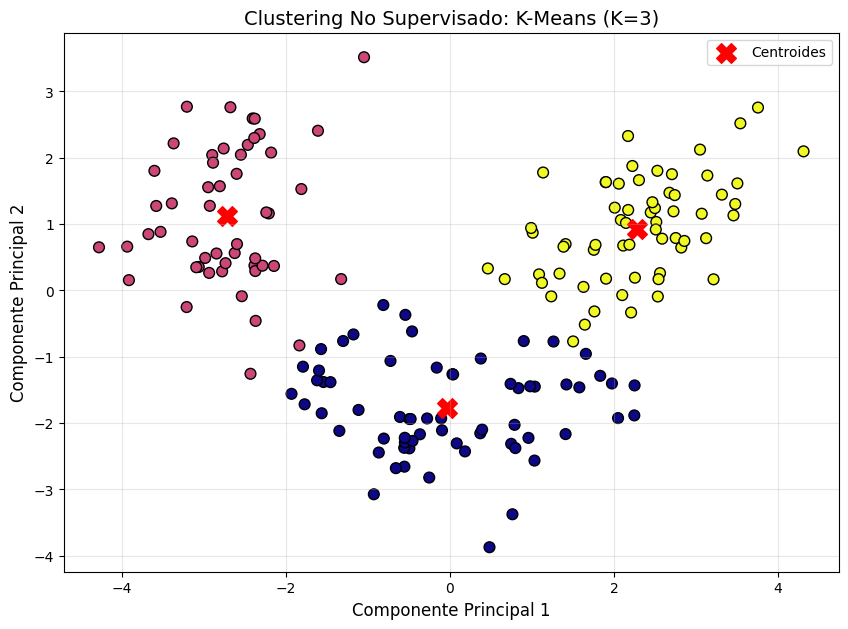

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Cargar datos e ignorar las etiquetas (y)
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2. Escalar datos (K-Means se basa en distancias)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Entrenar K-Means
# Buscamos 3 grupos porque sabemos que hay 3 tipos de uva,
# pero el modelo NO sabe cuál es cuál.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 4. Reducir a 2D con PCA para poder graficar los grupos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Graficar los resultados del Clustering
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='plasma', s=60, edgecolors='k')

# Graficar los centroides (opcional pero muy visual)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Clustering No Supervisado: K-Means (K=3)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()